In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

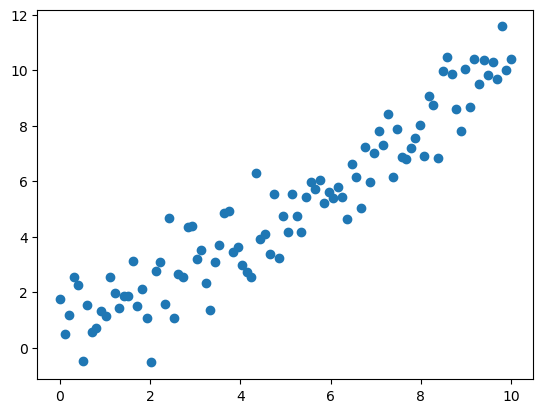

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regr = LinearRegression()
regr.fit(X,y)
regr.score(X,y)


0.8881140743377214

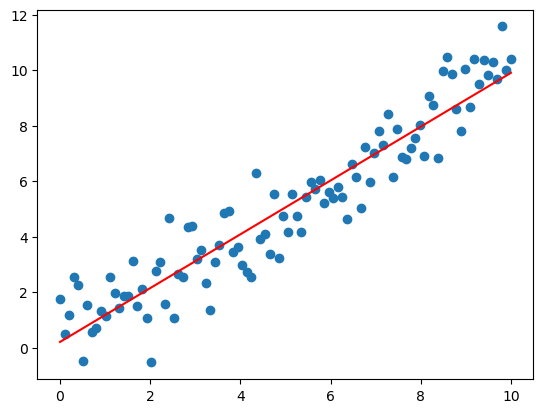

In [7]:
plt.scatter(X,y)
plt.plot(X,regr.predict(X), color='red')

# K-nearest neighbors classifier (KNN)

In [8]:
import pandas as pd

In [9]:
titanic = pd.read_excel('../Datasets/titanic.xls')


In [10]:
titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)

In [11]:
titanic.head()

,survived,pclass,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,0,1,1,2.0000
3,0,1,0,30.0000
4,0,1,1,25.0000


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [13]:
y = titanic['survived']
X = titanic.drop('survived',axis=1)

In [14]:
knn.fit(X,y)
knn.score(X,y)

0.7982791586998088

In [15]:
knn.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

In [16]:
def survie(model, pclass, sex, age):
    x = np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))

In [17]:
survie(knn,1,1,20)

[1]


/Users/mtis/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [18]:
def ideal_neighbors_number():
 
    n_list = []
    for i in range(1,10):
        model = KNeighborsClassifier(n_neighbors=i)
        n_list.append(model.fit(X, y).score(X,y))
    return n_list.index(max(n_list)),max(n_list)
        

In [19]:
ideal_neighbors_number()

(2, 0.8336520076481836)

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
X = iris.data
y = iris.target


In [22]:
X.shape

(150, 4)

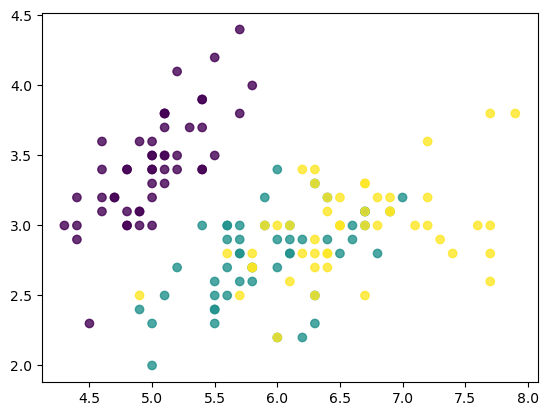

In [23]:
plt.scatter(X[:,0],X[:,1], c=y,alpha=0.8)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

Text(0.5, 1.0, 'Train set')

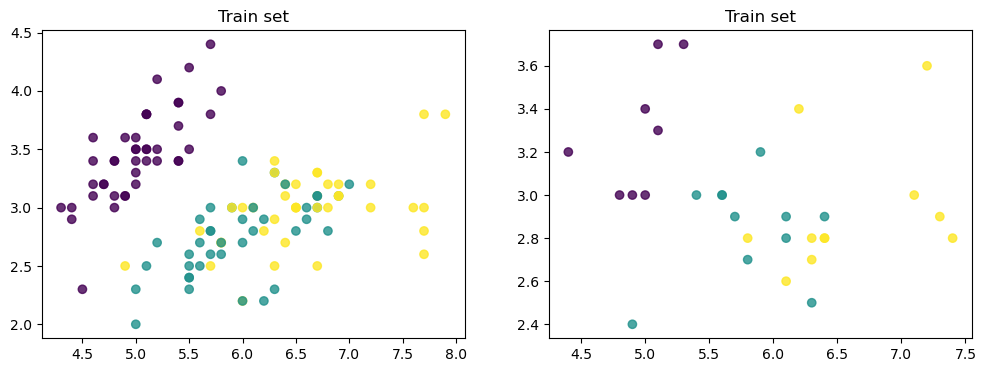

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train,alpha=0.8)
plt.title("Train set")
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test,alpha=0.8)
plt.title("Train set")


In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.score(X_train,y_train)

1.0

In [28]:
knn.score(X_test,y_test)

0.9

## Train set Validation set Test set

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy').mean()

0.975

## Validation cuve

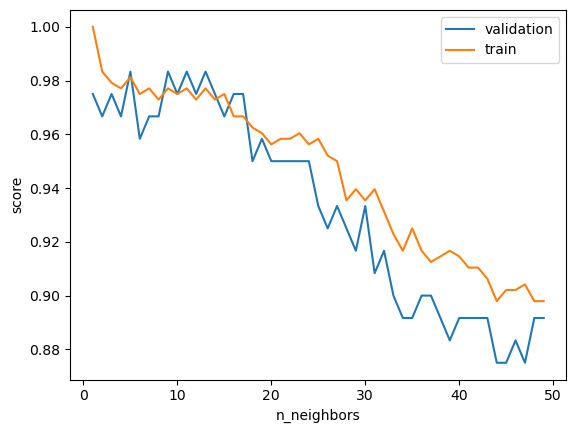

In [31]:
from sklearn.model_selection import validation_curve
knn = KNeighborsClassifier()
k = np.arange(1,50)
train_scores, val_scores = validation_curve(knn,X_train,y_train,param_name="n_neighbors",param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),label='train')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

## GridSearchCV pour tester tous les pparamètres d'un modèle


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')

In [35]:
grid.best_score_

0.9833333333333334

In [36]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [37]:
knn = grid.best_estimator_

In [38]:
knn.score(X_test,y_test)

0.9333333333333333

In [39]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion = confusion_matrix(y_test,knn.predict(X_test))
confusion

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

## Learning_curves

In [42]:
from sklearn.model_selection import learning_curve

In [52]:
N, train_scores, val_scores = learning_curve(knn,X_train,y_train,train_sizes=np.linspace(0.2,1,60))

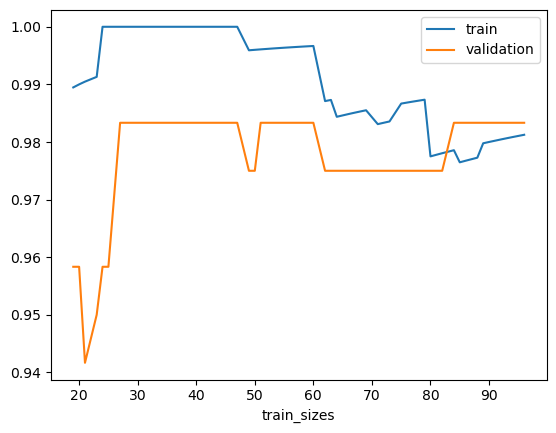

In [53]:
plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,val_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Etude complète d'un modèle de prédiction de survie sur le titanic
### 1) Créer un train et un test Set, obtenir une première évaluation
### 2) Avec GridSearch, trouver les meilleurs hyper-paramètres
### 3) Tracer les courbes pour vérifier s'il y a un overfitting ou underfitting
### 4) Learning_curve pour savoir si on peut améliorer la performance du modèle

## 1) Créer un train et un test Set, obtenir une première évaluation

## 2) Avec GridSearch, trouver les meilleurs hyper-paramètres

## 3) Tracer les courbes pour vérifier s'il y a un overfitting ou underfitting

## 4) Learning_curve pour savoir si on peut améliorer la performance du modèle